<h1>Kickstarter Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

## Import the Dataset
We need to import our data so we can work it. This time we will use a common library called pandas. This library allows us to view our data easily and manipulate it. 

To Do: 
- Read the csv into a dataframe
- Print out the first 5 elements of the dataframe

In [3]:
#import and view dataset
kickstarter = pd.read_csv("kickstarter2018.csv")
print(kickstarter.shape)
kickstarter.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Analyse the Data
Here we will use matplotlib to plot various graphs to help give us an understanding of what we will be working with. 

To Do:
- Plot a bar graph showing: 
             - amount in each main category 
             - break down of the state 
- Plot a scatter graph showing:
             - Goal vs State
             - Category vs Goal
             - Goal of project coloured based on state 
- Group the wines into good and bad then display them in a bar graph

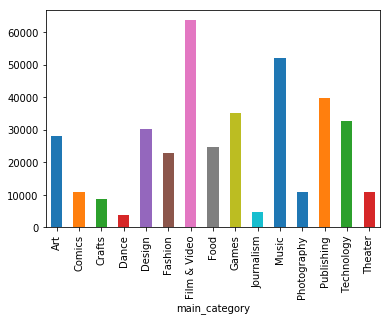

In [22]:
kickstarter.groupby('main_category').name.count().plot.bar(ylim=0)
plt.show()
# the amount in each category

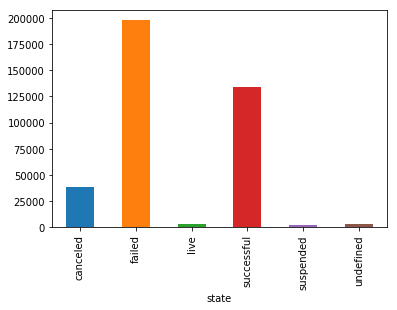

In [5]:
kickstarter.groupby('state').name.count().plot.bar(ylim=0)
plt.show()
# projects are most likely to fail

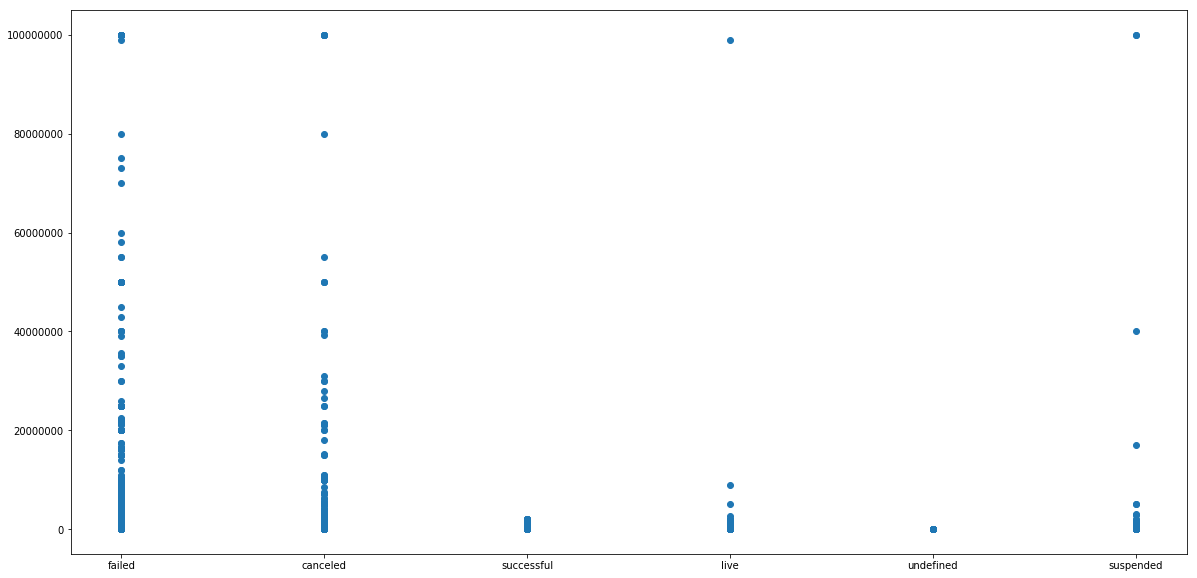

In [6]:
plt.figure(figsize=(20, 10))

plt.scatter(kickstarter.state, kickstarter.goal)
plt.ticklabel_format(style='plain', axis='y')

# shows that the number of sucessful projects are those with smaller amount goals 

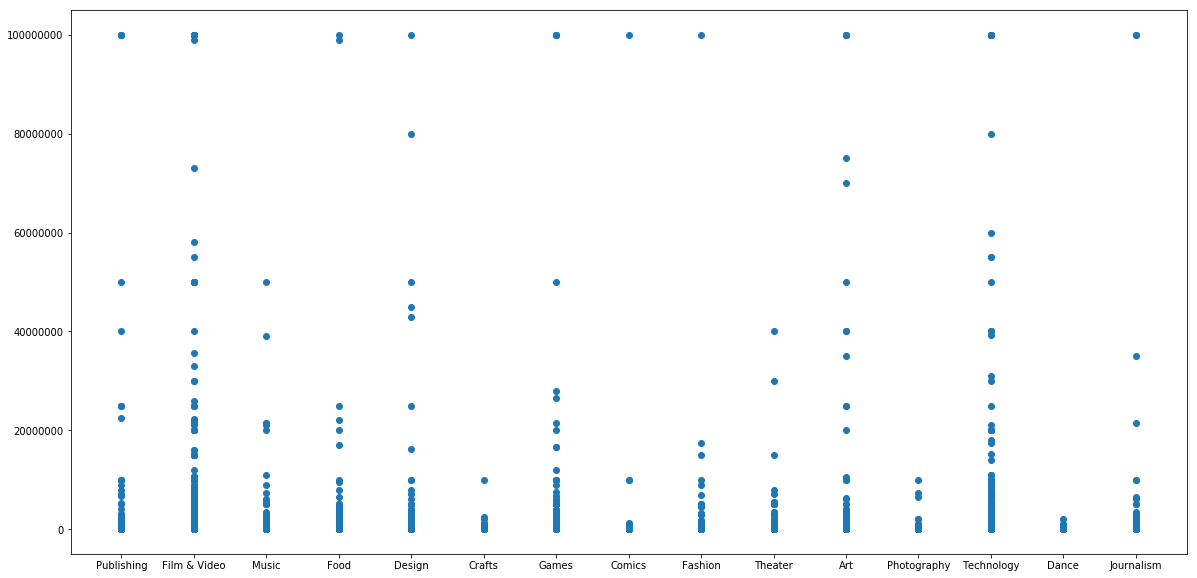

In [7]:
# distribution of the goal prices based on category
plt.figure(figsize=(20, 10))

plt.scatter(kickstarter.main_category, kickstarter.goal)
plt.ticklabel_format(style='plain', axis='y')

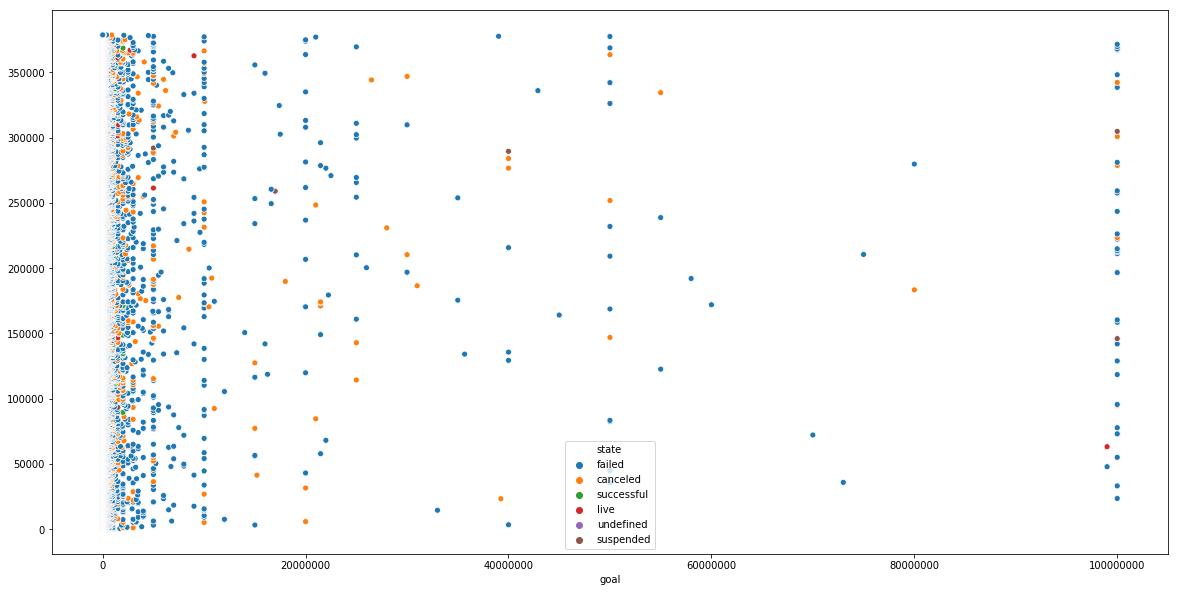

In [21]:
plt.figure(figsize=(20, 10))


# plt.scatter(kickstarter.index, kickstarter.goal)
sns.scatterplot(kickstarter.goal, kickstarter.index, hue=kickstarter.state, data=kickstarter)
# sns.plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.ticklabel_format(style='plain', axis='x')

## Split the Data
Now we need to split the data into a training and testing set, we will be using the scikit learn library as it has many useful functions that makes preparing our data much easier. We will be predicting sucess on based on the category and goal price.

To Do:
- Prepare the data to be split
- Use the train_test_split function to split our data into training and validation data

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#prepare data for training and testing

kickstarter['state_num'] = kickstarter['state'].factorize()[0]
kickstarter['category_num'] = kickstarter['main_category'].factorize()[0]

# failed = 0, cancelled = 1, sucessful = 2, live = 3, undefined = 4, suspended = 5

In [82]:
x = pd.concat([kickstarter['goal'], kickstarter['category_num'], kickstarter['backers'], kickstarter['pledged']], axis=1, keys=['goal', 'main_category', 'backers', 'pledged'])

y = kickstarter['state_num']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)


## Train the Model
Our data is prepared so now we can go ahead and train our chosen model, a RandomForestClassifier. 

To Do:
- Define the model
- Train the model
- Predict

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [84]:
predictions = model.predict(X_test)

In [85]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8677194882019728
